<a href="https://colab.research.google.com/github/Tashika-Wijesooriya/DL-lab-1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


In [2]:
rng = np.random.default_rng(42)  # 42 is just a "fun" seed number


In [3]:
# scale = 1 / λ   (lambda = rate)
scale = 1.0  # means λ = 1.0

arr_4x4 = rng.exponential(scale=scale, size=(4, 4))
print(arr_4x4)


[[2.4042086  2.33618966 2.384761   0.27979429]
 [0.0864374  1.45266052 1.40996069 3.12429596]
 [0.0792942  1.04656085 0.07043631 1.08902363]
 [1.73132735 0.38689482 1.23158566 0.15377325]]


In [4]:
#Task1 Q2

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# random generator for reproducibility
rng = np.random.default_rng(42)


In [6]:
scale = 1.0
n = 100_000

exp_sample  = rng.exponential(scale=scale, size=n)
uni_sample  = rng.random(n)                      # uniform(0,1)
norm_sample = rng.normal(loc=0, scale=1, size=n) # normal(0,1)


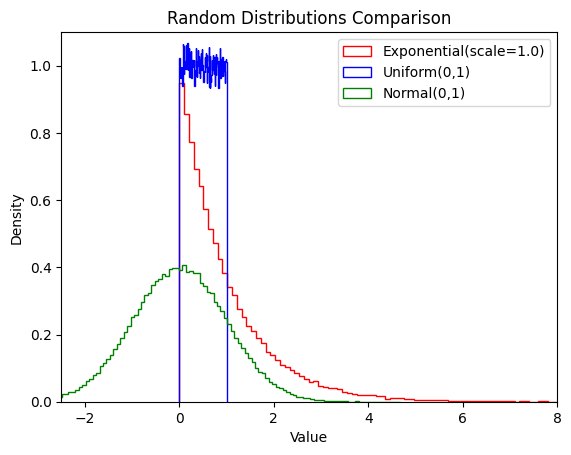

In [7]:
# choose number of bins
bins = 120  # try 40, 80, 200, etc.

# plot histograms in "step" style for clean lines
plt.hist(exp_sample,  density=True, bins=bins, histtype="step", color="red",   label="Exponential(scale=1.0)")
plt.hist(uni_sample,  density=True, bins=bins, histtype="step", color="blue",  label="Uniform(0,1)")
plt.hist(norm_sample, density=True, bins=bins, histtype="step", color="green", label="Normal(0,1)")

# adjust axis limits for better view
plt.axis([-2.5, 8, 0, 1.1])  # left, right, bottom, top

# labels and legend
plt.legend(loc="upper right")
plt.title("Random Distributions Comparison")
plt.xlabel("Value")
plt.ylabel("Density")

# show the plot
plt.show()

In [8]:
#Task1 Q3

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection


In [10]:
# range for x and y
x = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
y = np.linspace(-5, 5, 100)

# create the coordinate grid
X, Y = np.meshgrid(x, y)

# calculate Z
Z = X**2 + Y**2


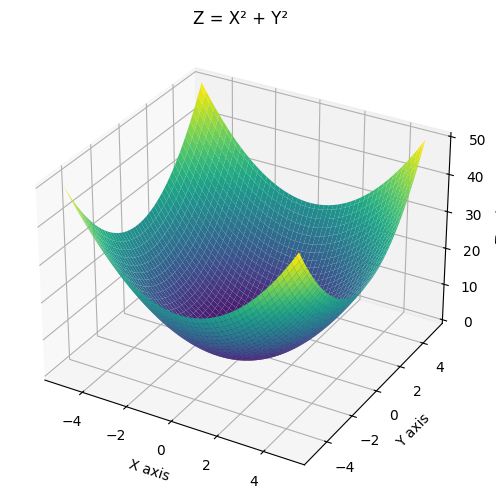

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# plot surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# labels
ax.set_title("Z = X² + Y²")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()


In [12]:
#Task1 Q4

In [13]:
# Pandas for managing datasets
import pandas as pd

In [14]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

In [15]:
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

In [16]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


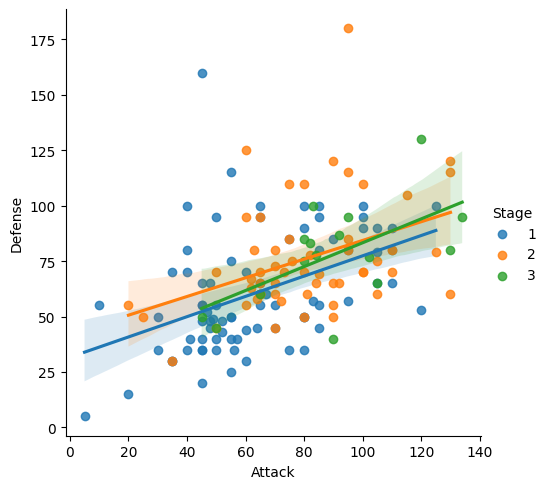

In [17]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=True, # No regression line
           hue='Stage')   # Color by evolution stage

<Axes: >

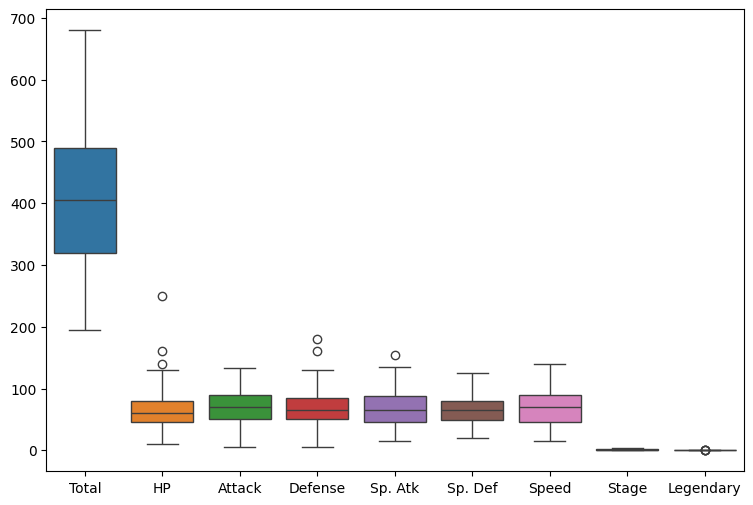

In [18]:
# Boxplot
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=df)

<Axes: >

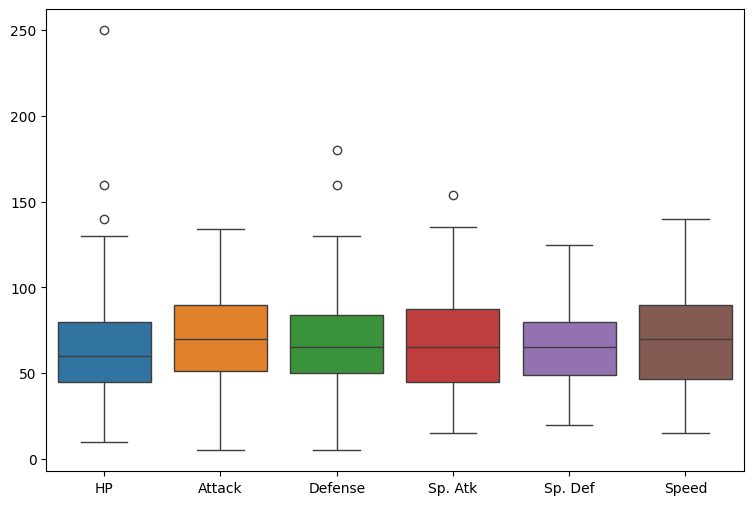

In [19]:
# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)

<Axes: xlabel='Type 1', ylabel='Attack'>

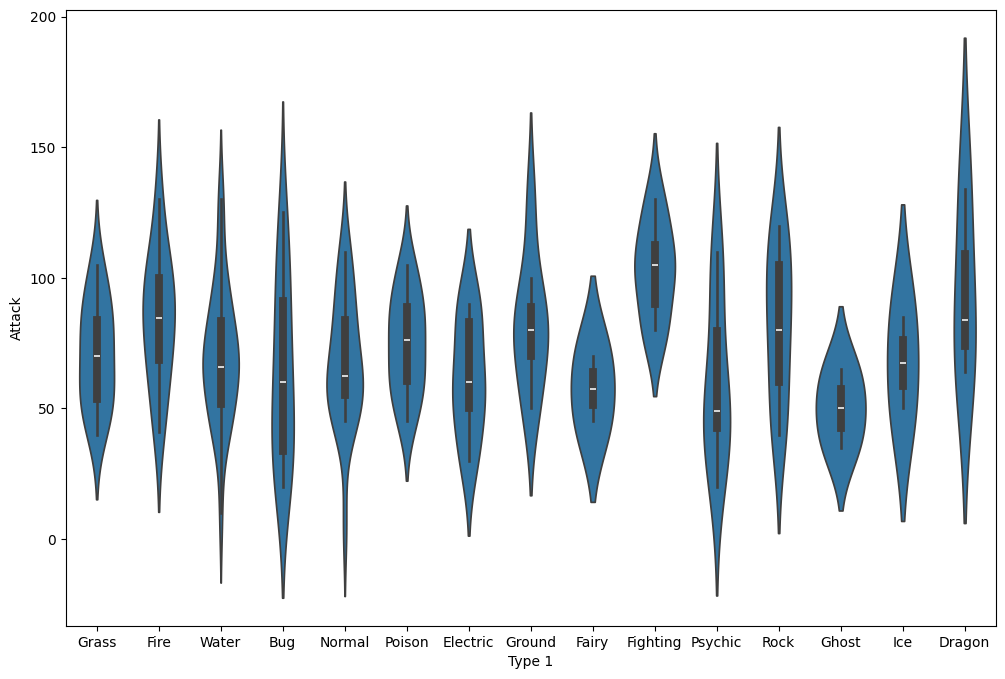

In [20]:
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

In [21]:
# Keep only numeric columns
stats_df = stats_df.select_dtypes(include=['number'])

# Now correlation will work without issues
corr = stats_df.corr()

print(corr)


               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


<Axes: >

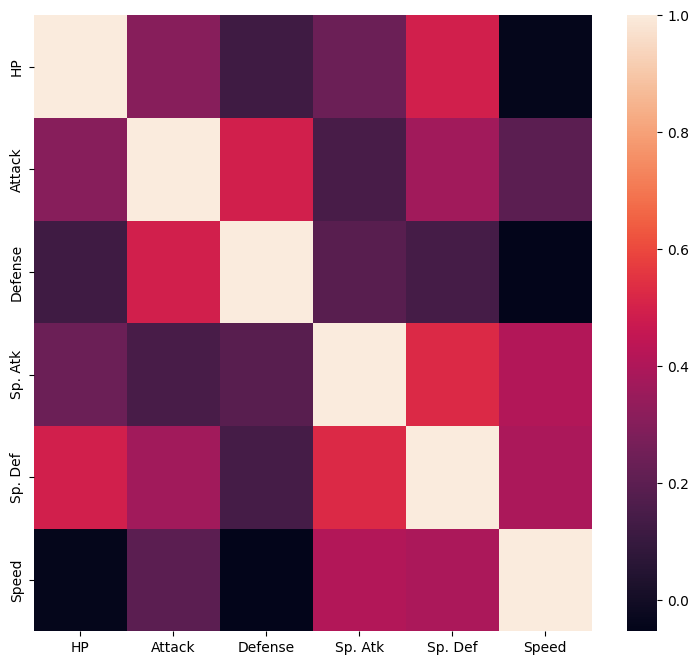

In [22]:
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

In [23]:
#Task2 Q1

In [26]:
from google.colab import files
uploaded = files.upload()  # choose your Au_nanoParticle_dataset.csv



Saving Au_nanoparticle_dataset.csv to Au_nanoparticle_dataset.csv


In [27]:
import pandas as pd

# Step 1: Load the CSV file (assuming you uploaded it manually to Colab)
df = pd.read_csv("Au_nanoparticle_dataset.csv")  # change filename if needed

# Step 2: Filter columns to keep only those 4 columns
cols_to_keep = ["N_total", "N_bulk", "N_surface", "R_avg"]
filtered_df = df[cols_to_keep]

# Step 3: Check the filtered dataframe
print("Filtered dataframe shape:", filtered_df.shape)
print(filtered_df.head())


Filtered dataframe shape: (4000, 4)
   N_total  N_bulk  N_surface    R_avg
0     1599    1014        585  17.3706
1     1642    1034        608  17.6061
2     4637    3365       1272  25.3692
3     7189    5292       1897  29.7011
4    11004    8508       2496  34.2831


In [28]:
#Task2 Q2

filtered_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [29]:
#Task2 Q3

In [30]:
# Mean for each column
mean_values = filtered_df.mean()

# Standard deviation for each column
std_values = filtered_df.std()

# Quartiles (25%, 50%, 75%)
quartiles = filtered_df.quantile([0.25, 0.5, 0.75])

# Display all results
print("Mean values:\n", mean_values, "\n")
print("Standard Deviation values:\n", std_values, "\n")
print("Quartiles (25%, 50%, 75%):\n", quartiles)


Mean values:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64 

Standard Deviation values:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64 

Quartiles (25%, 50%, 75%):
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


In [31]:
#Task2 Q4

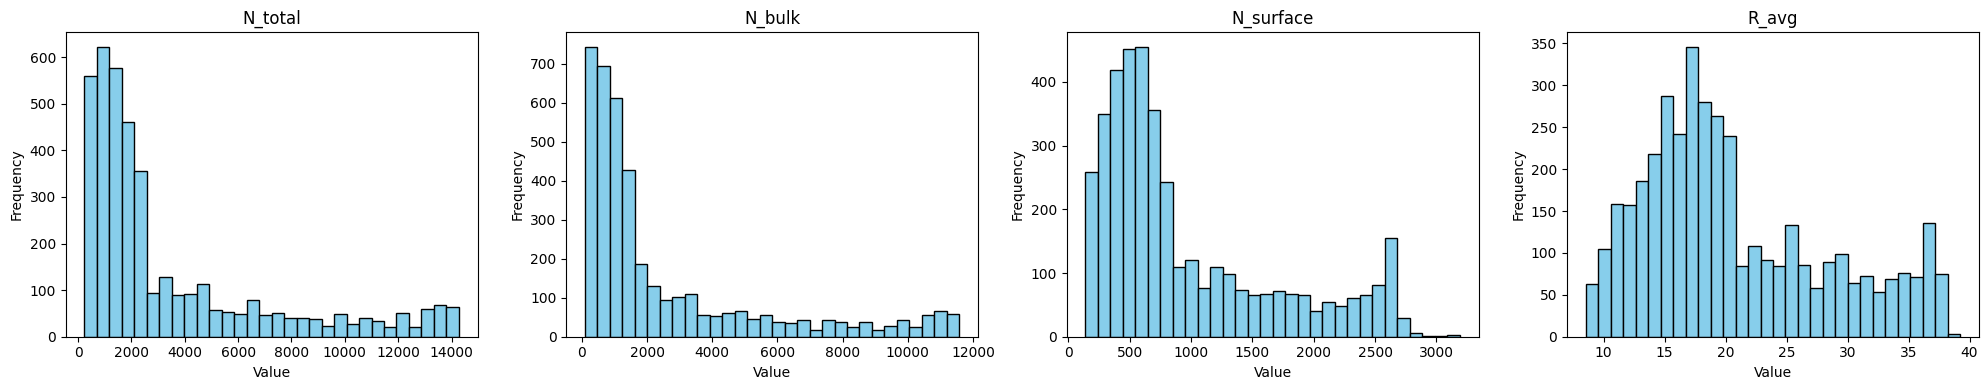

In [32]:
import matplotlib.pyplot as plt

features = ["N_total", "N_bulk", "N_surface", "R_avg"]

plt.figure(figsize=(20, 4))  # wide figure for 4 plots in a row

for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    plt.hist(filtered_df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [33]:
#Task2 Q5

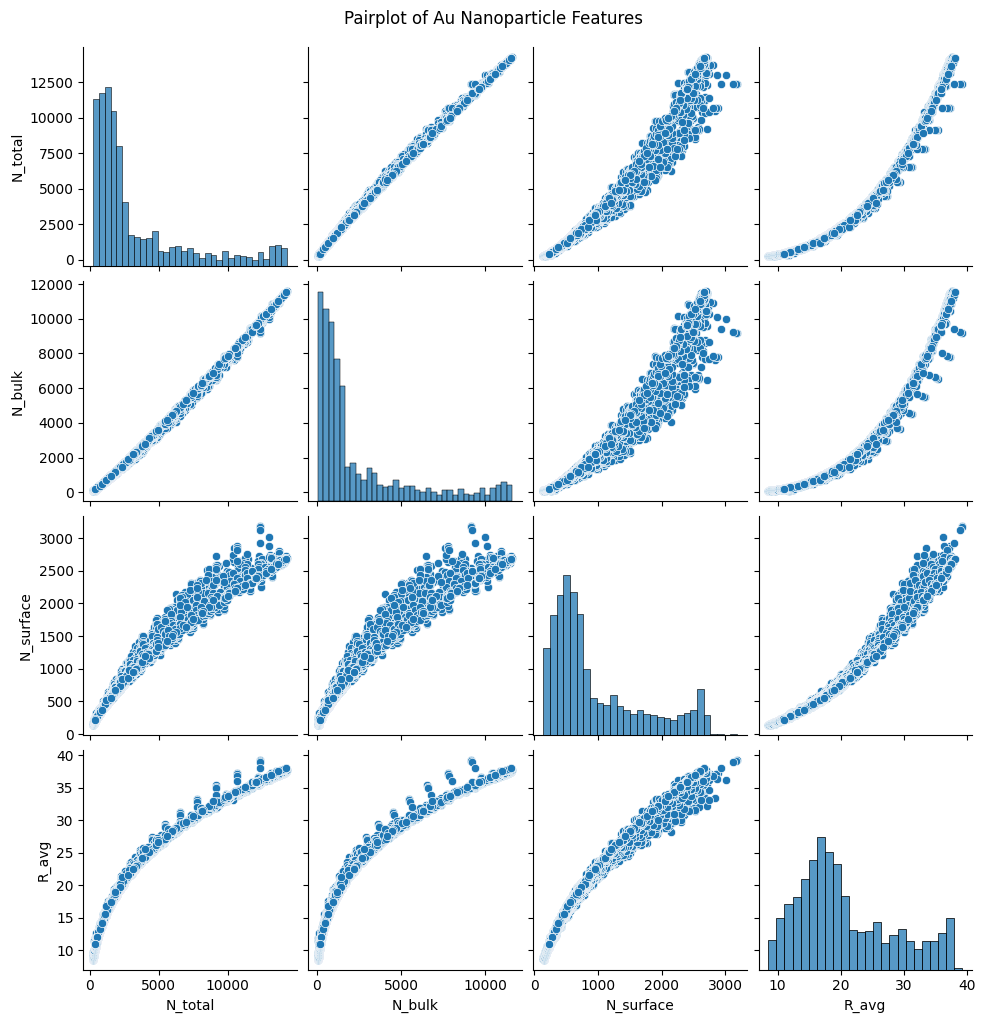

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for all columns in filtered_df
sns.pairplot(filtered_df)

plt.suptitle("Pairplot of Au Nanoparticle Features", y=1.02)  # Add a title, move it up a bit
plt.show()


In [35]:
#Task2 Q6

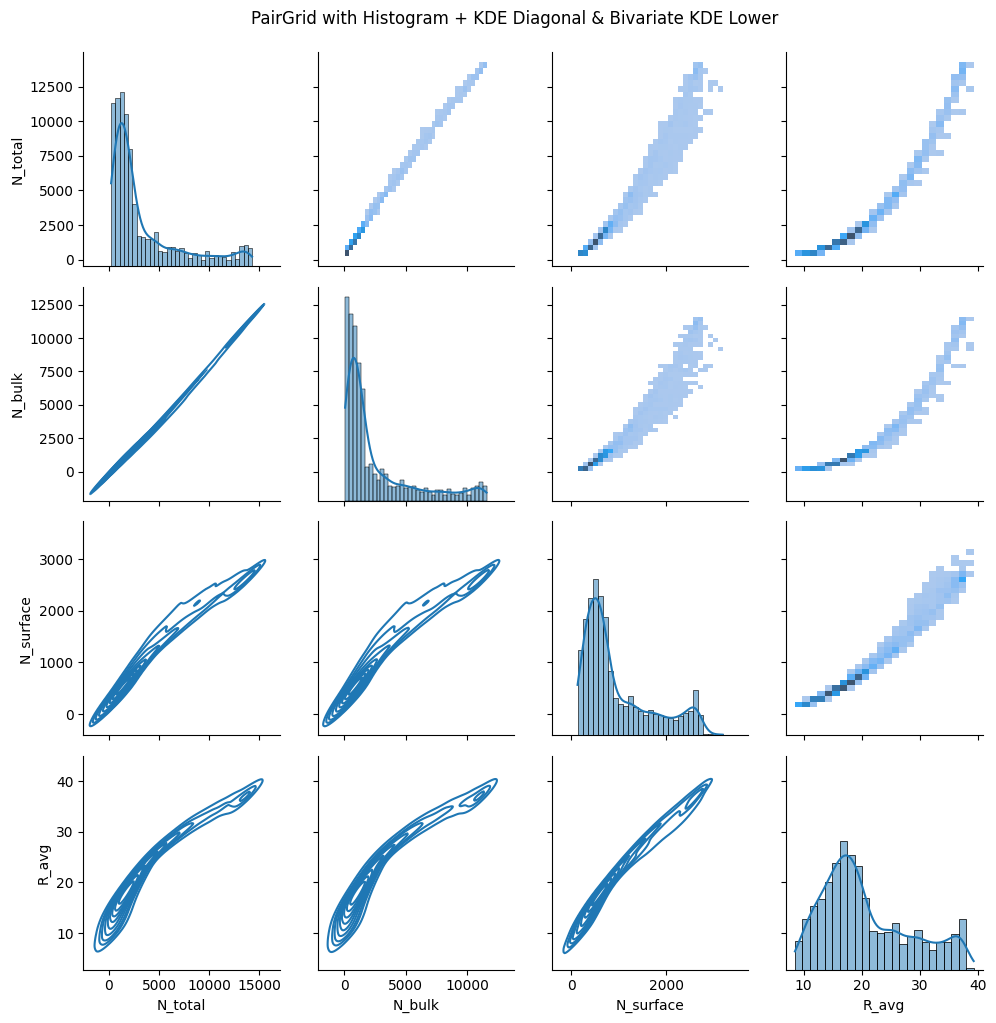

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume new_df = filtered_df with your 4 features
new_df = filtered_df.copy()

# Create the PairGrid
g = sns.PairGrid(new_df)

# Upper: histograms (univariate)
g.map_upper(sns.histplot)

# Diagonal: histogram + KDE
g.map_diag(lambda x, **kwargs: sns.histplot(x, kde=True, **kwargs))

# Lower: bivariate KDE
g.map_lower(sns.kdeplot)

plt.suptitle("PairGrid with Histogram + KDE Diagonal & Bivariate KDE Lower", y=1.02)
plt.show()
